In [0]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

    '''
    performs the Batch Gradient Descent Algorithm taking current value of theta (theta_0, theta_1,…, theta_n), 
    learning rate (alpha), number of iterations (num_iters), list of hypothesis values of all samples (h),
     feature set (X), Target Variable set (y) and Number of Features (n) as input
    '''

In [54]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) *sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

'''
It is the principal function that takes the features matrix (X), Target Variable Vector (y), 
learning rate (alpha) and number of iterations (num_iters) as input and outputs the final optimized theta
'''


'\nIt is the principal function that takes the features matrix (X), Target Variable Vector (y), \nlearning rate (alpha) and number of iterations (num_iters) as input and outputs the final optimized theta\n'

ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [0]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [0]:
data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/data2.txt', delimiter=',')
X_train = data[:,[0,1]] #feature set
y_train = data[:,2] #label set

In [0]:
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]


In [0]:
# calling the principal function with learning_rate = 0.0001 and 
# num_iters = 300000
theta, cost = linear_regression(X_train, y_train,0.0001, 300000)

Text(0, 0.5, 'Cost')

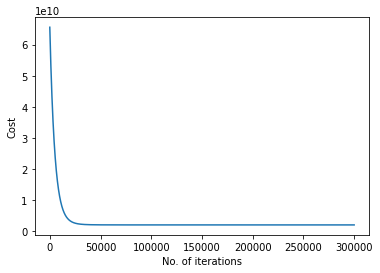

In [60]:
cost = list(cost)
n_iterations = [x for x in range(1,300001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

Text(0.5, 0, 'Actual Housing Price')

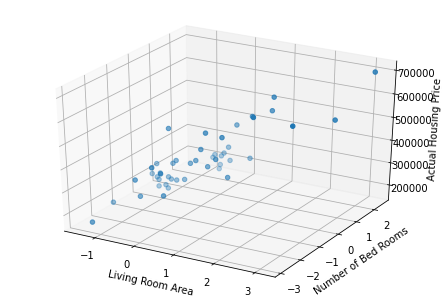

In [61]:
sequence_containing_x_vals = list(X_train.transpose()[0])
sequence_containing_y_vals = list(X_train.transpose()[1])
sequence_containing_z_vals = list(y_train)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Actual Housing Price', fontsize=10)

Text(0.5, 0, 'Housing Price Predictions')

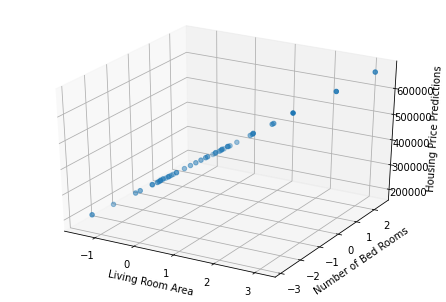

In [62]:
# Getting the predictions...
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train)
                         ,axis = 1)
predictions = hypothesis(theta, X_train, X_train.shape[1] - 1)


sequence_containing_x_vals = list(X_train.transpose()[1])
sequence_containing_y_vals = list(X_train.transpose()[2])
sequence_containing_z_vals = list(predictions)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals)
ax.set_xlabel('Living Room Area', fontsize=10)
ax.set_ylabel('Number of Bed Rooms', fontsize=10)
ax.set_zlabel('Housing Price Predictions', fontsize=10)